In [29]:
dirFile <- "/Users/hoang/Documents/SaveDataFromServer/SimulatedData/OnlyCaseControl_ChangeOrder/"
fileN0 <- dir(dirFile, "RData")

fileN0 <- fileN0[grep("ChangeIntegralOrder", fileN0)]
#fileN <- fileN[grep(".1000.|.2000.", fileN, invert = TRUE)]
fileN0 <- fileN0[grep("10000", fileN0)]

library("rstan")

In [30]:
head(fileN0)


[1] "result.ChangeIntegralOrder.nIter.1000017_24_May_16_2016.gammaMeanDN.3.gammaMeanDenovo.10.gammaMeanDN2.1.3.gammaMeanDenovo2.2.5.pi0.0.03.rhocC.0.0001259163.rhoCC2.0.0002007499.lowerHyperGamma.0.5.casecontrolAndDenovo.2classes.RData"
[2] "result.ChangeIntegralOrder.nIter.1000017_24_May_16_2016.gammaMeanDN.3.gammaMeanDenovo.10.gammaMeanDN2.1.3.gammaMeanDenovo2.2.5.pi0.0.03.rhocC.0.0001259163.rhoCC2.0.0002007499.lowerHyperGamma.0.casecontrolAndDenovo.2classes.RData"  
[3] "result.ChangeIntegralOrder.nIter.1000017_24_May_16_2016.gammaMeanDN.3.gammaMeanDenovo.10.gammaMeanDN2.1.3.gammaMeanDenovo2.2.5.pi0.0.03.rhocC.0.0001259163.rhoCC2.0.0002007499.lowerHyperGamma.1.casecontrolAndDenovo.2classes.RData"  
[4] "result.ChangeIntegralOrder.nIter.1000017_24_May_16_2016.gammaMeanDN.3.gammaMeanDenovo.10.gammaMeanDN2.1.3.gammaMeanDenovo2.2.5.pi0.0.06.rhocC.0.0001259163.rhoCC2.0.0002007499.lowerHyperGamma.0.5.casecontrolAndDenovo.2classes.RData"
[5] "result.ChangeIntegralOrder.nIter.1000017_24_May_16_2016.gammaMeanDN.3.gammaMeanDenovo.10.gammaMeanDN2.1.3.gammaMeanDenovo2.2.5.pi0.0.06.rhocC.0.0001259163.rhoCC2.0.0002007499.lowerHyperGamma.0.casecontrolAndDenovo.2classes.RData"  
[6] "result.ChangeIntegralOrder.nIter.1000017_24_May_16_2016.gammaMeanDN.3.gammaMeanDenovo.10.gammaMeanDN2.1.3.gammaMeanDenovo2.2.5.pi0.0.06.rhocC.0.0001259163.rhoCC2.0.0002007499.lowerHyperGamma.1.casecontrolAndDenovo.2classes.RData"

Inference for Stan model: fd9c5fc3a8749457c9e055a0b3fb4af9.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                          mean se_mean   sd      2.5%       25%       50%
pi0                       0.03    0.00 0.01      0.02      0.02      0.03
hyperGammaMeanLoFdn       8.99    0.23 5.07      1.32      5.04      8.45
hyperGammaMeanLoFcc       3.01    0.04 0.84      1.44      2.40      2.97
hyperGammaMeanMis3dn      3.35    0.08 1.74      0.82      1.91      3.18
hyperGammaMeanMis3cc      1.78    0.03 0.65      0.69      1.29      1.72
hyperBetaLoFdn            1.00    0.00 0.01      0.98      0.99      1.00
hyperBetaLoFcc            4.00    0.00 0.01      3.98      3.99      4.00
hyperBetaMis3cc           4.00    0.00 0.01      3.98      3.99      4.00
hyperBetaMis3dn           4.00    0.00 0.01      3.98      3.99      4.00
lp__                 -68313.58    0.15 3.32 -68321.22 -68315.67 -68313.21
        

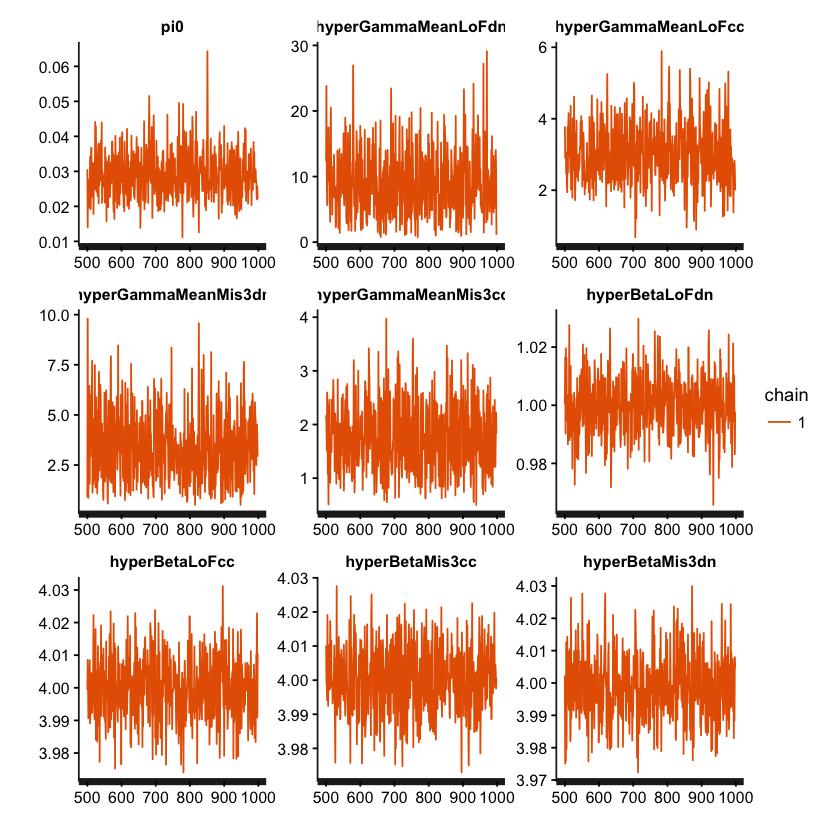

In [31]:
load(paste(dirFile, fileN0[1], sep = ""))
testFitSingleCC
library("rstan")
stan_trace(testFitSingleCC)

## Lower Gamma = 0

In [32]:
i = 1
fileN <- fileN0[grep("lowerGamma.0.Chan", fileN0)]
outData <- NULL
for (i in 1:length(fileN)){
  load(paste(dirFile, fileN[i], sep = ""))

  b1 <- as.data.frame(testFitSingleCC)
  
  b0 <- c(pi0, gammaMean)
  b01 <- round(apply(b1, 2, median), 3)[1:2]
#  b02 <- abs(b0 - b01)
  outData <- rbind(outData, c(b0, b01))
}

rownames(outData) <- fileN
rName <- c("pi0", 'gammaMean')
eName <- c("e.pi0", 'e.gammaMean')


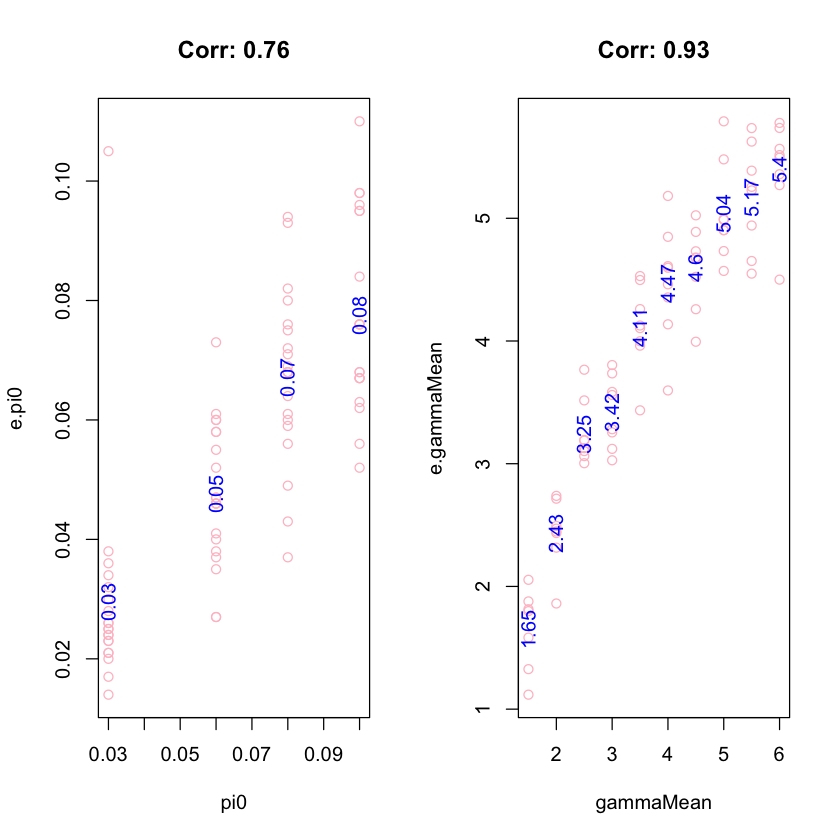

In [33]:

par(mfrow = c(1, 2))
KK <- 2
for (j in 1:KK){
  corJ <- round(cor(outData[, j], outData[, j + KK]), 2)
plot(outData[, j], outData[, j + KK], xlab = rName[j], ylab = eName[j], 
     main = paste('Corr: ', corJ, sep = ''), col = 'pink')
        sTemp <- sapply(split(outData[, j + KK], outData[, j]), mean)
sTemp
text(as.numeric(names(sTemp)), sTemp, round(sTemp, 2), col = 'blue', lwd = 1.5, srt = '90')

}
b2 <- outData[order(abs(outData[, 3])), ]


Inference for Stan model: cf95756229917e42f9f11d9b9b66ed38.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                         mean se_mean   sd      2.5%       25%       50%
pi0                      0.14    0.01 0.13      0.01      0.04      0.10
hyperGammaMeanLoFcc      1.36    0.02 0.41      0.67      1.09      1.33
hyperBetaLoFcc          13.67    0.00 0.01     13.65     13.66     13.67
lp__                -28035.57    0.07 1.64 -28039.48 -28036.31 -28035.24
                          75%     97.5% n_eff Rhat
pi0                      0.21      0.46   432    1
hyperGammaMeanLoFcc      1.58      2.31   445    1
hyperBetaLoFcc          13.68     13.69   492    1
lp__                -28034.38 -28033.65   500    1

Samples were drawn using NUTS(diag_e) at Mon May 16 13:02:59 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chain

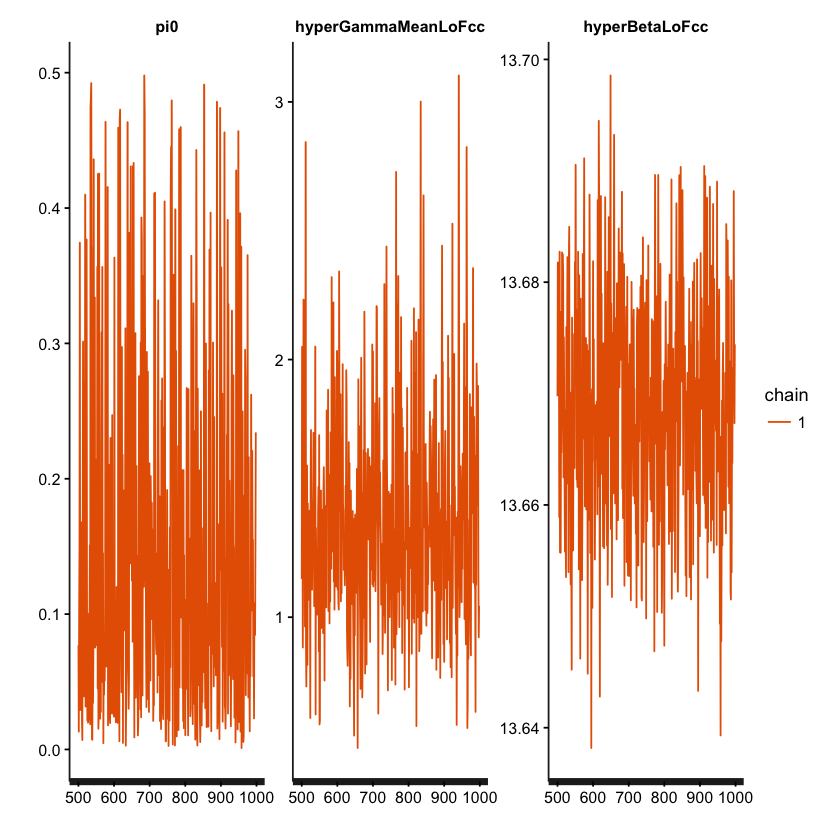

In [34]:
load(paste(dirFile, fileN[1], sep = ""))
testFitSingleCC
library("rstan")
stan_trace(testFitSingleCC)

## Lower gamma 0.5

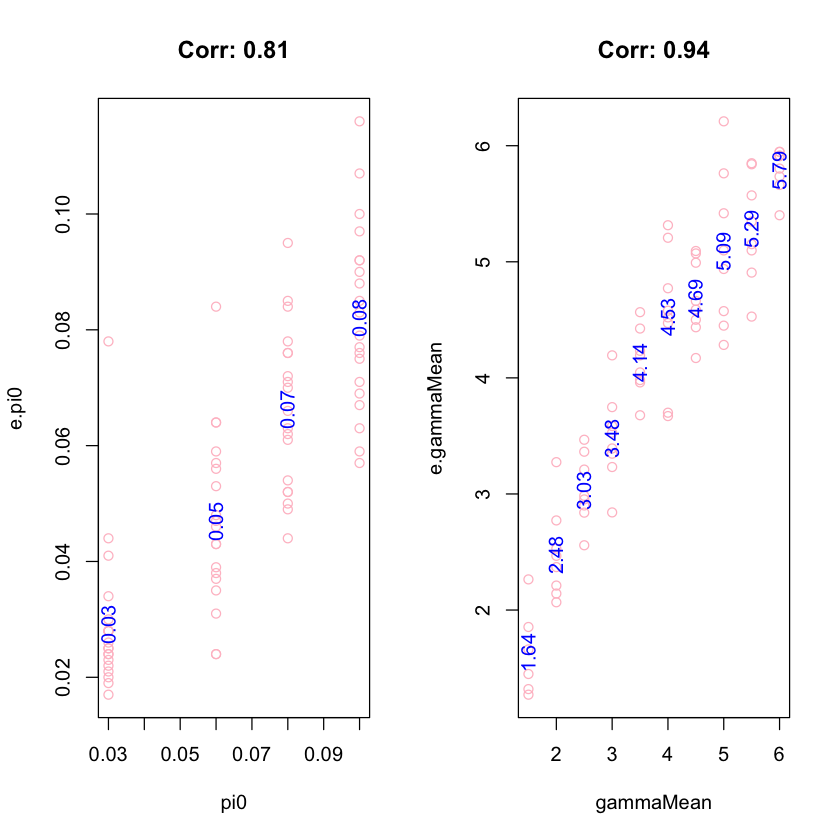

In [35]:
i = 1
fileN <- fileN0[grep("lowerGamma.0.5.ChangeInt", fileN0)]
outData <- NULL
for (i in 1:length(fileN)){
  load(paste(dirFile, fileN[i], sep = ""))

  b1 <- as.data.frame(testFitSingleCC)
  
  b0 <- c(pi0, gammaMean)
  b01 <- round(apply(b1, 2, median), 3)[1:2]
#  b02 <- abs(b0 - b01)
  outData <- rbind(outData, c(b0, b01))
}

rownames(outData) <- fileN
rName <- c("pi0", 'gammaMean')
eName <- c("e.pi0", 'e.gammaMean')


par(mfrow = c(1, 2))
KK <- 2
for (j in 1:KK){
  corJ <- round(cor(outData[, j], outData[, j + KK]), 2)
plot(outData[, j], outData[, j + KK], xlab = rName[j], ylab = eName[j], 
     main = paste('Corr: ', corJ, sep = ''), col = 'pink')
        sTemp <- sapply(split(outData[, j + KK], outData[, j]), mean)
sTemp
text(as.numeric(names(sTemp)), sTemp, round(sTemp, 2), col = 'blue', lwd = 1.5, srt = '90')

}
b2 <- outData[order(abs(outData[, 3])), ]


Inference for Stan model: cf95756229917e42f9f11d9b9b66ed38.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                         mean se_mean   sd      2.5%       25%       50%
pi0                      0.13    0.01 0.12      0.00      0.04      0.08
hyperGammaMeanLoFcc      1.32    0.02 0.44      0.71      1.03      1.27
hyperBetaLoFcc          13.67    0.00 0.01     13.65     13.66     13.67
lp__                -26896.64    0.10 1.67 -26900.83 -26897.40 -26896.19
                          75%     97.5% n_eff Rhat
pi0                      0.18      0.46   500 1.00
hyperGammaMeanLoFcc      1.51      2.18   458 1.00
hyperBetaLoFcc          13.68     13.69   499 1.00
lp__                -26895.43 -26894.57   268 1.01

Samples were drawn using NUTS(diag_e) at Mon May 16 14:10:13 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chain

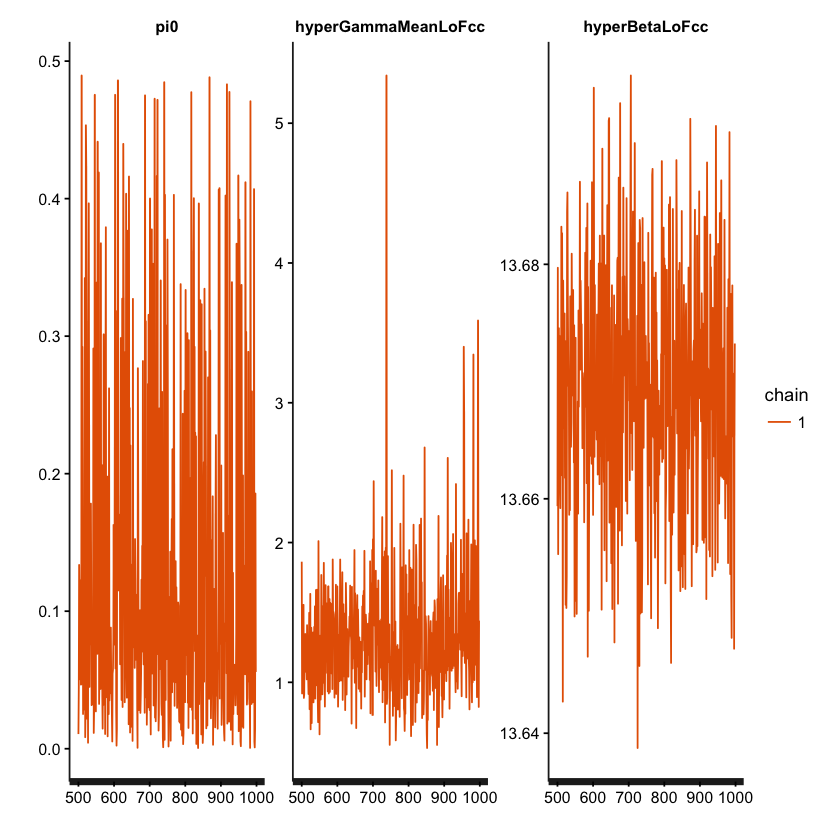

In [36]:
load(paste(dirFile, fileN[1], sep = ""))
testFitSingleCC
library("rstan")
stan_trace(testFitSingleCC)

## Lower gamma 1

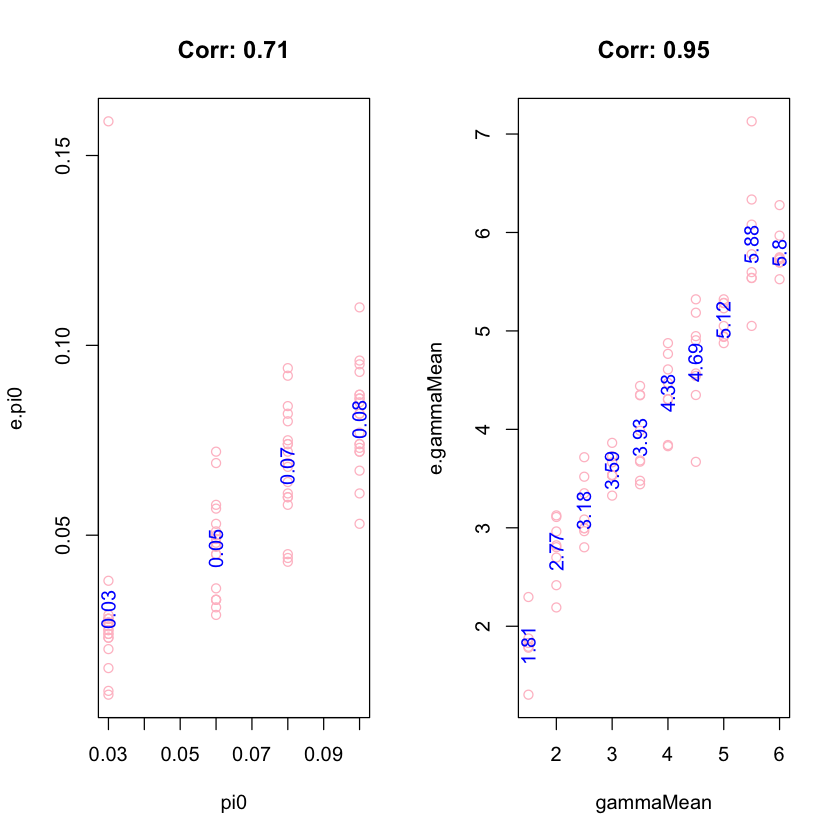

In [37]:
i = 1
fileN <- fileN0[grep("lowerGamma.1.ChangeIntegra", fileN0)]
outData <- NULL
for (i in 1:length(fileN)){
  load(paste(dirFile, fileN[i], sep = ""))

  b1 <- as.data.frame(testFitSingleCC)
  
  b0 <- c(pi0, gammaMean)
  b01 <- round(apply(b1, 2, median), 3)[1:2]
#  b02 <- abs(b0 - b01)
  outData <- rbind(outData, c(b0, b01))
}

rownames(outData) <- fileN
rName <- c("pi0", 'gammaMean')
eName <- c("e.pi0", 'e.gammaMean')


par(mfrow = c(1, 2))
KK <- 2
for (j in 1:KK){
  corJ <- round(cor(outData[, j], outData[, j + KK]), 2)
plot(outData[, j], outData[, j + KK], xlab = rName[j], ylab = eName[j], 
     main = paste('Corr: ', corJ, sep = ''), col = 'pink')
        sTemp <- sapply(split(outData[, j + KK], outData[, j]), mean)
sTemp
text(as.numeric(names(sTemp)), sTemp, round(sTemp, 2), col = 'blue', lwd = 1.5, srt = '90')

}
b2 <- outData[order(abs(outData[, 3])), ]


Inference for Stan model: cf95756229917e42f9f11d9b9b66ed38.
1 chains, each with iter=10000; warmup=5000; thin=10; 
post-warmup draws per chain=500, total post-warmup draws=500.

                         mean se_mean   sd      2.5%       25%       50%
pi0                      0.18    0.01 0.12      0.01      0.08      0.16
hyperGammaMeanLoFcc      1.36    0.01 0.26      1.02      1.15      1.30
hyperBetaLoFcc          13.67    0.00 0.01     13.65     13.66     13.67
lp__                -26921.89    0.07 1.63 -26925.85 -26922.76 -26921.57
                          75%     97.5% n_eff Rhat
pi0                      0.26      0.46   394    1
hyperGammaMeanLoFcc      1.54      1.98   482    1
hyperBetaLoFcc          13.68     13.69   500    1
lp__                -26920.66 -26919.79   489    1

Samples were drawn using NUTS(diag_e) at Mon May 16 13:28:32 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chain

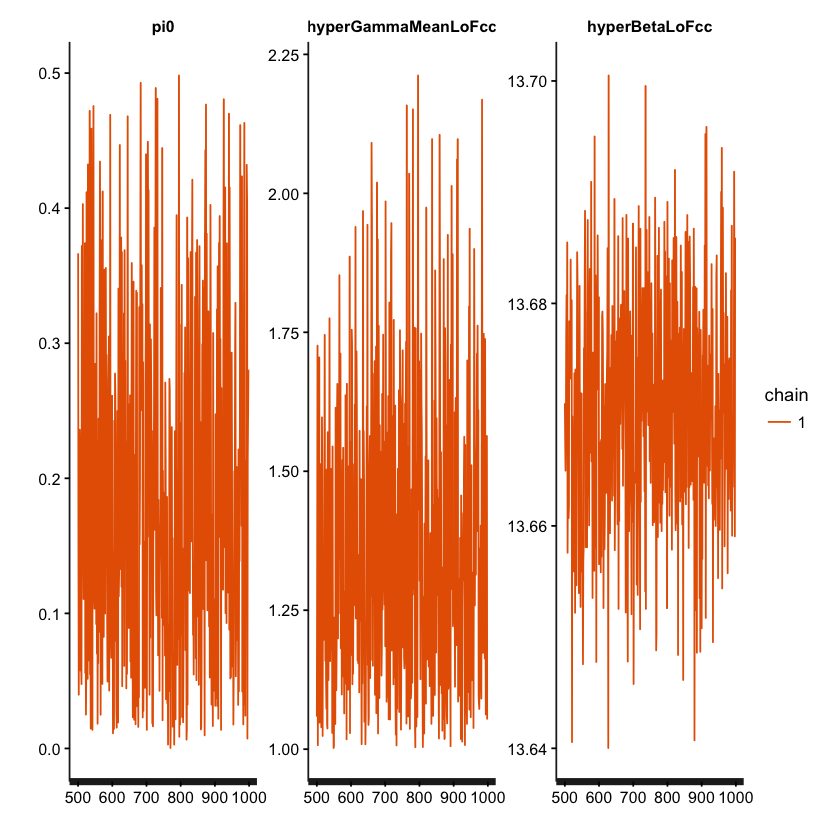

In [38]:
load(paste(dirFile, fileN[1], sep = ""))
testFitSingleCC
library("rstan")
stan_trace(testFitSingleCC)